In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rm

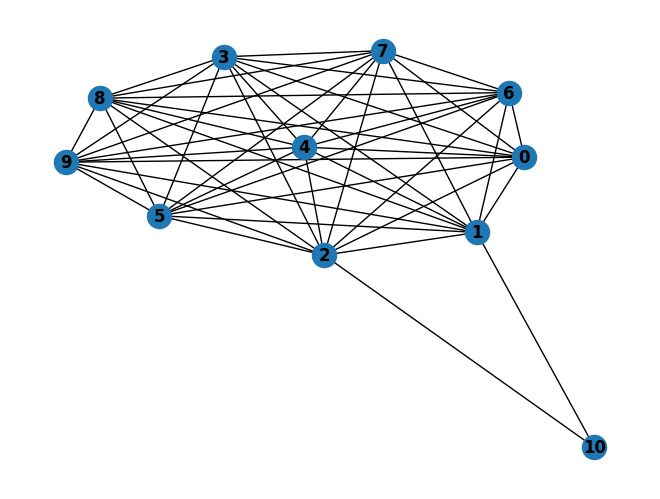

In [9]:
G = nx.Graph()

# nodes = [i for i in range(6)]
# edges = [(1, 2), (1, 3), (1, 4), (2, 4), (3, 5), (5, 5)]

G = nx.complete_graph(10)

G.add_nodes_from([10])
G.add_edges_from([(2,10),(1,10)])

for i in range(4):
    for j in range(i+1, 4):
        G.edges[i, j]["color"] = "red"
        

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [10]:
def initial_population(n, size):
    population = []
    for i in range(size):
        individual = ""
        for i in range(n):
            individual += rm.choice("01")
        population.append(individual)
    return population
    
def adaptability(G, individual):
    subgraph_v = []
    for i in range(len(individual)):
        if individual[i]=="1":
            subgraph_v.append(i)
    subgraph = nx.subgraph(G, subgraph_v)
    n = len(subgraph_v)
    return max(n-(n*(n-1)//2 - subgraph.number_of_edges())*10, 0)

def roulette(population, k):
    
    population_weights = [adaptability(G, ind) for ind in population]
    descendants = rm.choices(population, population_weights, k=k)
        
    return descendants

def crossover(parents):
    parent1, parent2 = parents
    point = rm.randint(0, len(parent1)-1)
    child = parent1[:point] + parent2[point:]
    return child 

def mutation(individual):# сделать шанс
    point = rm.randint(0, len(individual)-1)
    out = list(individual)
    if out[point] == "1":
        out[point] = "0"
    else:
        out[point] = "1"
    return "".join(out)

In [12]:
n = 11
p_size = 5
np_size = 5

population = initial_population(n, p_size)
p_adaptability = [adaptability(G, ind) for ind in population]
p_adaptability, population = (list(t) for t in zip(*sorted(zip(p_adaptability, population), reverse=True)))
iter = 0

while(p_adaptability[0] < 10 and iter < 1000): #  ???
    
    # выбор родителей + скрещивание + мутация
    for i in range(np_size):
        population.append(mutation( crossover( roulette(population, 2) ) )) #  ???
        
    # сортировка по приспособленности  
    p_adaptability = [adaptability(G, ind) for ind in population]
    p_adaptability, population = (list(t) for t in zip(*sorted(zip(p_adaptability, population), reverse=True)))

    # выбор новой популяции
    population = rm.choices(population, p_adaptability, k=p_size) #  переделать
    
    iter += 1
    
print(p_adaptability)
print(population)
print(iter)

[10, 9, 9, 8, 8, 7, 6, 6, 6, 5]
['11111000010', '11111010110', '01111111110', '01111000110', '01111110110']
29
